<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#準備" data-toc-modified-id="準備-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>準備</a></span></li><li><span><a href="#bisection法" data-toc-modified-id="bisection法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>bisection法</a></span></li><li><span><a href="#newton法" data-toc-modified-id="newton法-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>newton法</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>plot</a></span></li></ul></div>


<br />

<div style="text-align: center;">
<font size="7">fsolveの課題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/fsolve</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4"> 22/10/14 チーム西谷　40009 西谷滋人　</font>
</div>

関数
$ \exp(-x)= x^2$
の解を二分法(bisection)とNewton法で求めて，収束性を比較する

# 準備

関数のdefと微分，plotで確かめておく．
plotには，matplotlib.pyplotを使う．また，
数値計算に向いたlibraryのnumpyを入れておく．
数式処理での微分のためにsympyを入れておく．

関数の微分は以下の通りにできる

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import *

x = symbols('x')


def func(x):
    return exp(-x)-x**2

def df(x):
    return diff(func(x), x)

print(df(x))


-2*x - exp(-x)


plotのdataはnumpyで用意する．
その際に，exp関数としてnumpyのexp関数を使わないとエラーがでるので，def内ではnp.expと明示している．
関数によっては解の範囲x0,x1を変更しなければならない．

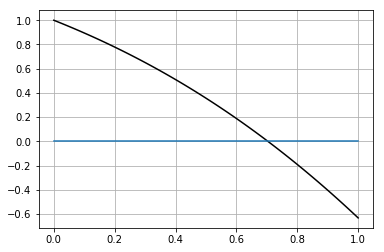

In [2]:
def func(x):
    return  np.exp(-x)-x**2
def df(x):
    return  -2*x - np.exp(-x)

x0=0.0
x1=1.0
x = np.linspace(x0, x1, 101)
y = func(x)
plt.plot(x, y, color = 'k')
plt.plot([x0,x1],[0,0])
plt.grid()
plt.show()


pythonが用意している標準的な解法によって解(x0)をえておく．
fsolveはarray構造を返すので，値として取り出すために[0]を指定している．

In [4]:
from scipy.optimize import fsolve
x0 = fsolve(func, 0.0)[0]
x0

0.70346742249839178

# bisection法

二分法(bisection)での解．
list_bisecというarrayを用意しておき，それに値を追加(append)していく．

In [5]:
x1, x2 = 0.0, 1.0
f1, f2 = func(x1), func(x2)
print('%+15s %+15s %+15s %+15s'  % ('x1','x2','f1','f2'))
print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec = [[0],[abs(x1-x0)]]
for i in range(0, 20):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x1-x0))
    else:
        x2, f2 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x2-x0))

    print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec
print()


             x1              x2              f1              f2
  +0.0000000000   +1.0000000000   +1.0000000000   -0.6321205588
  +0.5000000000   +1.0000000000   +0.3565306597   -0.6321205588
  +0.5000000000   +0.7500000000   +0.3565306597   -0.0901334473
  +0.6250000000   +0.7500000000   +0.1446364285   -0.0901334473
  +0.6875000000   +0.7500000000   +0.0301753280   -0.0901334473
  +0.6875000000   +0.7187500000   +0.0301753280   -0.0292404858
  +0.7031250000   +0.7187500000   +0.0006511313   -0.0292404858
  +0.7031250000   +0.7109375000   +0.0006511313   -0.0142486319
  +0.7031250000   +0.7070312500   +0.0006511313   -0.0067872536
  +0.7031250000   +0.7050781250   +0.0006511313   -0.0030651888
  +0.7031250000   +0.7041015625   +0.0006511313   -0.0012063109
  +0.7031250000   +0.7036132812   +0.0006511313   -0.0002774104
  +0.7033691406   +0.7036132812   +0.0001869053   -0.0002774104
  +0.7033691406   +0.7034912109   +0.0001869053   -0.0000452413
  +0.7034301758   +0.7034912109   +0.000

# newton法

list_newtonに追加していく．

In [8]:
x1 = 1.0
f1 = func(x1)
list_newton = [[0],[x1]]
print('%-15.10f %+24.25f' % (x1,f1))
for i in range(0, 4):
    x1 = x1 - f1 / df(x1)
    f1 =func(x1)
    print('%-24.25f %+24.25f' % (x1,f1))
    list_newton[0].append(i)
    list_newton[1].append(abs(x1-x0))

list_newton
print()

1.0000000000    -0.6321205588285576659757226
0.7330436052454454287641283 -0.0569084480040253914978621
0.7038077863241329890087172 -0.0006473915387465445370196
0.7034674683317975185659066 -0.0000000871660306156485376
0.7034674224983924473164620 -0.0000000000000014988010832



# plot
bisection法とnewton法による収束の様子をplotする．
plt.yscale('log')でy軸を対数目盛りにすると見やすい．

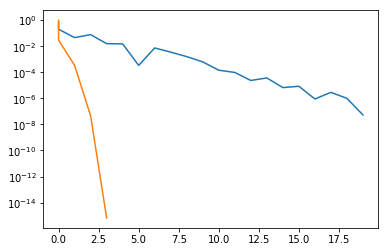

In [9]:
import matplotlib.pyplot as plt

X = list_bisec[0]
Y = list_bisec[1]
plt.plot(X, Y)

X = list_newton[0]
Y = list_newton[1]
plt.plot(X, Y)

plt.yscale("log") # y軸を対数目盛に
plt.show()

Newton法の方が圧倒的に速く正しい解に収束している．例えば，青線で示した分割(bi section)法では，ステップ数が0回から五回になるにつれて， 
$10^{-1}$から$10^{-2}$程度にしか正解に近づいていない．
しかし，赤線でしましたNewton法では一度のステップで一桁から２桁精度が上がっている．